# Upload custom invoice dataset to HF

In [7]:
import os

from dotenv import load_dotenv
from datasets import load_from_disk, load_dataset

from src.config import init_config

## Config and settings

In [3]:
load_dotenv()

True

In [4]:
config = init_config()

In [8]:
print(config)

data:
  fatura: mathieu1256/FATURA2-invoices
  rvl_cdip_subset: jinhybr/rvl_cdip_400_train_val_test
  invoiceXpert:
    hf_path: wiF0n/InvoiceXpert
    local_path: data/invoiceXpert
    num_labels: 2
    label_col: label
    image_col: image
    label_names:
    - invoice
    - not-invoice
models:
  classification:
    oob:
      pt: microsoft/dit-base
      ft: microsoft/dit-base-finetuned-rvlcdip
  retrieval:
    layoutlmv3: microsoft/layoutlmv3-base
    layoutlmv3_invoice_ft: Theivaprakasham/layoutlmv3-finetuned-invoice
mlflow:
  experiments:
    classification: invoice-classification
utils:
  seed: 420
  run_date: 2024-58-03/03/24



## Load data

In [6]:
invoice_df = load_from_disk(config.data.invoiceXpert.local_path)

## Upload data

In [9]:
# publish dataset
invoice_df.push_to_hub(repo_id=config.data.invoiceXpert.hf_path, token=os.environ["HF_TOKEN"])

Uploading the dataset shards:   0%|          | 0/6 [00:00<?, ?it/s]

Map:   0%|          | 0/2234 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

Map:   0%|          | 0/2234 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

Map:   0%|          | 0/2233 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

Map:   0%|          | 0/2233 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

Map:   0%|          | 0/2233 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

Map:   0%|          | 0/2233 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/15 [00:00<?, ?ba/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/15 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/30.0 [00:00<?, ?B/s]

c:\Users\DAVID.KUBANDA\code\repos\InvoiceXpert\.venv\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DAVID.KUBANDA\.cache\huggingface\hub\datasets--wiF0n--InvoiceXpert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


CommitInfo(commit_url='https://huggingface.co/datasets/wiF0n/invoiceXpert/commit/d232ea25730c88b609896c662cac2bb817f01fb0', commit_message='Upload dataset', commit_description='', oid='d232ea25730c88b609896c662cac2bb817f01fb0', pr_url=None, pr_revision=None, pr_num=None)

## Test if we can download the data

In [10]:
downloaded_data = load_dataset(config.data.invoiceXpert.hf_path)

Generating train split:   0%|          | 0/13400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3200 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

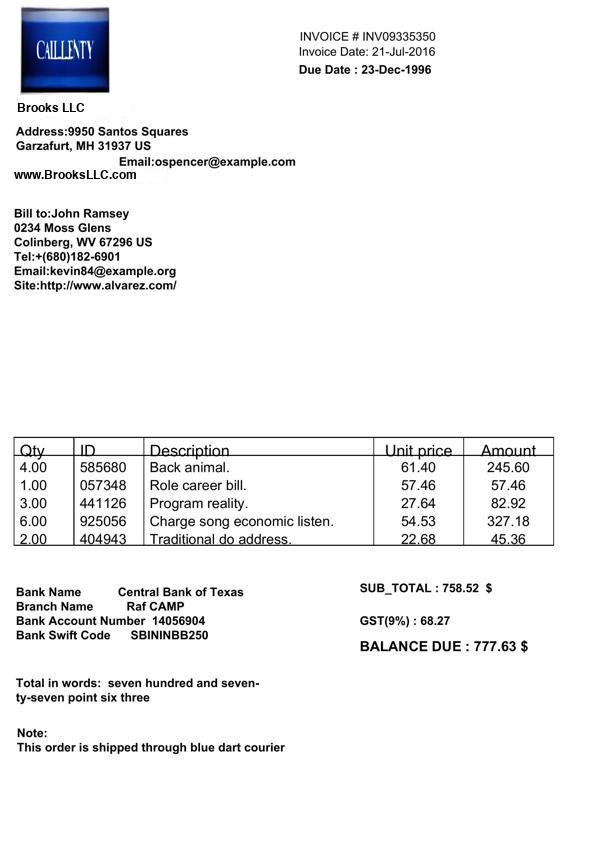

In [13]:
downloaded_data['train'][0]["image"]